# MSC_DA_CA_2023205 

## Scenario: Transport in Ireland

In [104]:
#Importing libraries
#General libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import panel as pn
import hvplot.pandas
from hvplot import explorer

#Statistics libraries
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import t,f_oneway,iqr, skew, norm, uniform, kurtosis, kstest, shapiro

#Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import nltk 
from nltk.corpus import stopwords
nltk.download("stopwords")

#Dashboard libraries
import plotly.express as px
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
from datetime import datetime, date

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ledag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Exploratory Data Analysis

**Ireland Dataset** 

The dataset named `TII03` to be used in the analysis for Ireland, has been imported using `Pandas` library.
This the data was collected from `https://data.europa.eu/data`.  

In [2]:
#Importing the datasets
df_ireland1 = pd.read_csv("TII03.csv")

 `Head()` method gives a first glimpse of which attributes are included in the dataset. As seen below there are 8 columns, at first glance the columns `STATISTIC` and `UNIT` seem to be unnecessary which means that to clean our dataset dropping them could be useful. The column `TLIS(W1)` and `Week` contain in different formats the same information making one of them redundant.

In [3]:
#Exploring dataset by dataset
df_ireland1.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03132V03784,Luas Line,UNIT,VALUE
0,TII03C01,Passenger Journeys,2019W01,2019 Week 01,-,All Luas lines,Number,549533.0
1,TII03C01,Passenger Journeys,2019W01,2019 Week 01,1,Red line,Number,274139.0
2,TII03C01,Passenger Journeys,2019W01,2019 Week 01,2,Green line,Number,275394.0
3,TII03C01,Passenger Journeys,2019W02,2019 Week 02,-,All Luas lines,Number,839022.0
4,TII03C01,Passenger Journeys,2019W02,2019 Week 02,1,Red line,Number,408199.0


In [4]:
#Examining the dataset's shape
print(f"Dataset's shape: {df_ireland1.shape}")

Dataset's shape: (768, 8)


As mentioned before as part of the date cleaning the unnecessary attributes will be dropped. In this case 4 columns does not add value in the analysis of the dataframe. These columns are `STATISTIC`, `Statistic Label`, `TLIST(W1)` and `UNIT`.

In [5]:
#Dropping unnecessary columns
df_ireland1.drop(columns = ["STATISTIC","Statistic Label","TLIST(W1)","UNIT"], axis = 1, inplace = True)
df_ireland1.head()

,Week,C03132V03784,Luas Line,VALUE
0,2019 Week 01,-,All Luas lines,549533.0
1,2019 Week 01,1,Red line,274139.0
2,2019 Week 01,2,Green line,275394.0
3,2019 Week 02,-,All Luas lines,839022.0
4,2019 Week 02,1,Red line,408199.0


In [6]:
#Examining the data types included in the dataset
df_ireland1.dtypes

Week             object
C03132V03784     object
Luas Line        object
VALUE           float64
dtype: object

It has been noticed the attribute `Week` holds relevant information, however, in the formast presented cannot be used properly, therefore splitting it in 2 in `Year` and `Week_Year` makes it more useful.

In [7]:
#Separating attribute ["Week"] into 2 attributes ["Year"] and ["Week_Year"]
split = df_ireland1["Week"].str.split(" ", n = 1, expand = True)
df_ireland1["Year"] =  split[0]
df_ireland1["Week_Year"] =  split[1]
df_ireland1.drop(columns = ["Week"], axis = 1, inplace = True)
df_ireland1

,C03132V03784,Luas Line,VALUE,Year,Week_Year
0,-,All Luas lines,549533.0,2019,Week 01
1,1,Red line,274139.0,2019,Week 01
2,2,Green line,275394.0,2019,Week 01
3,-,All Luas lines,839022.0,2019,Week 02
4,1,Red line,408199.0,2019,Week 02
...,...,...,...,...,...
763,1,Red line,578178.0,2023,Week 43
764,2,Green line,528068.0,2023,Week 43
765,-,All Luas lines,949071.0,2023,Week 44
766,1,Red line,502054.0,2023,Week 44


In [8]:
#Reindexing the dataset for understanding purposes
df_ireland1 = df_ireland1[["Year","Week_Year","Luas Line","C03132V03784","VALUE"]]
df_ireland1

,Year,Week_Year,Luas Line,C03132V03784,VALUE
0,2019,Week 01,All Luas lines,-,549533.0
1,2019,Week 01,Red line,1,274139.0
2,2019,Week 01,Green line,2,275394.0
3,2019,Week 02,All Luas lines,-,839022.0
4,2019,Week 02,Red line,1,408199.0
...,...,...,...,...,...
763,2023,Week 43,Red line,1,578178.0
764,2023,Week 43,Green line,2,528068.0
765,2023,Week 44,All Luas lines,-,949071.0
766,2023,Week 44,Red line,1,502054.0


The method `describe()` provides a general statistic analysis 

In [9]:
#Examining general statistics parameters of the dataset
df_ireland1.describe()

,VALUE
count,7.590000e+02
mean,4.378549e+05
std,2.669235e+05
min,1.972700e+04
25%,2.289615e+05
50%,4.204630e+05
75%,5.307355e+05
max,1.173473e+06


In [10]:
#Having a look at the general information of the dataset
df_ireland1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          768 non-null    object 
 1   Week_Year     768 non-null    object 
 2   Luas Line     768 non-null    object 
 3   C03132V03784  768 non-null    object 
 4   VALUE         759 non-null    float64
dtypes: float64(1), object(4)
memory usage: 30.1+ KB


Null values `isna()` and duplicates `duplicates()` are one of the revision that have to be made to any dataset since they have an impact on the results.

In [12]:
#Confirming the presence or not of null values
print(f'Duplicated values on dataset:\n{df_ireland1.isna().sum()}\n')

#Confirming the presence or not of duplicated values
print(f'Duplicated values on dataset: {df_ireland1.duplicated().sum()}')

Duplicated values on dataset:
Year            0
Week_Year       0
Luas Line       0
C03132V03784    0
VALUE           9
dtype: int64

Duplicated values on dataset: 0


In [13]:
#Identifying the missing values to make a decision of how to proceed with it
null_data = df_ireland1[df_ireland1.isnull().any(axis=1)]
null_data

,Year,Week_Year,Luas Line,C03132V03784,VALUE
156,2019,Week 53,All Luas lines,-,NaN
157,2019,Week 53,Red line,1,NaN
158,2019,Week 53,Green line,2,NaN
474,2021,Week 53,All Luas lines,-,NaN
475,2021,Week 53,Red line,1,NaN
476,2021,Week 53,Green line,2,NaN
633,2022,Week 53,All Luas lines,-,NaN
634,2022,Week 53,Red line,1,NaN
635,2022,Week 53,Green line,2,NaN


All the missing values seem to belong to the record of the `Week 53`  of the year. The years shown above are not leap years, therefore, the `Week 53` did not exist explaining why these records are missing.

In [14]:
#Renaming columns for better understanding
df_ireland1.rename(columns = {"Luas Line": "Luas_line","C03132V03784": "Luas_line_encoded", "Days of Week": "Week_day", "VALUE": "Passengers"}, inplace = True)
df_ireland1

,Year,Week_Year,Luas_line,Luas_line_encoded,Passengers
0,2019,Week 01,All Luas lines,-,549533.0
1,2019,Week 01,Red line,1,274139.0
2,2019,Week 01,Green line,2,275394.0
3,2019,Week 02,All Luas lines,-,839022.0
4,2019,Week 02,Red line,1,408199.0
...,...,...,...,...,...
763,2023,Week 43,Red line,1,578178.0
764,2023,Week 43,Green line,2,528068.0
765,2023,Week 44,All Luas lines,-,949071.0
766,2023,Week 44,Red line,1,502054.0


Getting more insights on each attribute performing the `unique()` and `nununique()` functions.

In [15]:
#Creating a function to find the unique values in x dataframe
def dataframe_uniques(dataset):
    columns = dataset.columns
    for column in columns:
        print(f'{column}: {dataset[column].unique()}')
        print(f'{column}: {dataset[column].nunique()}\n')

In [16]:
dataframe_uniques(df_ireland1)

Year: ['2019' '2020' '2021' '2022' '2023']
Year: 5

Week_Year: ['Week 01' 'Week 02' 'Week 03' 'Week 04' 'Week 05' 'Week 06' 'Week 07'
 'Week 08' 'Week 09' 'Week 10' 'Week 11' 'Week 12' 'Week 13' 'Week 14'
 'Week 15' 'Week 16' 'Week 17' 'Week 18' 'Week 19' 'Week 20' 'Week 21'
 'Week 22' 'Week 23' 'Week 24' 'Week 25' 'Week 26' 'Week 27' 'Week 28'
 'Week 29' 'Week 30' 'Week 31' 'Week 32' 'Week 33' 'Week 34' 'Week 35'
 'Week 36' 'Week 37' 'Week 38' 'Week 39' 'Week 40' 'Week 41' 'Week 42'
 'Week 43' 'Week 44' 'Week 45' 'Week 46' 'Week 47' 'Week 48' 'Week 49'
 'Week 50' 'Week 51' 'Week 52' 'Week 53']
Week_Year: 53

Luas_line: ['All Luas lines' 'Red line' 'Green line']
Luas_line: 3

Luas_line_encoded: ['-' '1' '2']
Luas_line_encoded: 3

Passengers: [ 549533.  274139.  275394.  839022.  408199.  430823.  819359.  376785.
  442574.  860745.  405224.  455521.  912795.  441197.  471598.  912612.
  449398.  463215.  940476.  466795.  473682.  952291.  480974.  471317.
  929391.  468299.  461093.  

After getting the uniques per attribute it can be conclude the following:
- The dataset contains record of 5 years in which just 2020 is a leap year containing 53 weeks.
- It is important to mention that in the attribute `Luas Line` the dataset has data for `All Luas Lines`, `Red line` and `Green line`.The dataset has to be separated and least in two `All Luas lines` and leave `Red line` and `Green line` together or separate them in 2 depending on the objective.
- The attribute `Line_encoded` contains a unique value of `-` which can be related to one type of `Luas Line`, however is not useful in this way, it has to be edited.

In [17]:
#Checking how many weeks have been recorded for the year 2023
df_ireland1.loc[df_ireland1["Year"] == 2023]
df_ireland1

,Year,Week_Year,Luas_line,Luas_line_encoded,Passengers
0,2019,Week 01,All Luas lines,-,549533.0
1,2019,Week 01,Red line,1,274139.0
2,2019,Week 01,Green line,2,275394.0
3,2019,Week 02,All Luas lines,-,839022.0
4,2019,Week 02,Red line,1,408199.0
...,...,...,...,...,...
763,2023,Week 43,Red line,1,578178.0
764,2023,Week 43,Green line,2,528068.0
765,2023,Week 44,All Luas lines,-,949071.0
766,2023,Week 44,Red line,1,502054.0


In [18]:
#Dropping the missing values
df_ireland1.dropna(inplace = True)
df_ireland1

,Year,Week_Year,Luas_line,Luas_line_encoded,Passengers
0,2019,Week 01,All Luas lines,-,549533.0
1,2019,Week 01,Red line,1,274139.0
2,2019,Week 01,Green line,2,275394.0
3,2019,Week 02,All Luas lines,-,839022.0
4,2019,Week 02,Red line,1,408199.0
...,...,...,...,...,...
763,2023,Week 43,Red line,1,578178.0
764,2023,Week 43,Green line,2,528068.0
765,2023,Week 44,All Luas lines,-,949071.0
766,2023,Week 44,Red line,1,502054.0


In [20]:
#Tidying the `luas_line_encoded` 
def replace_values(code):
    if code == "-":
        return 0
    else:
        return code
    
df_ireland1["Luas_line_encoded"] = df_ireland1["Luas_line_encoded"].apply(replace_values)
df_ireland1

,Year,Week_Year,Luas_line,Luas_line_encoded,Passengers
0,2019,Week 01,All Luas lines,0,549533.0
1,2019,Week 01,Red line,1,274139.0
2,2019,Week 01,Green line,2,275394.0
3,2019,Week 02,All Luas lines,0,839022.0
4,2019,Week 02,Red line,1,408199.0
...,...,...,...,...,...
763,2023,Week 43,Red line,1,578178.0
764,2023,Week 43,Green line,2,528068.0
765,2023,Week 44,All Luas lines,0,949071.0
766,2023,Week 44,Red line,1,502054.0


In [21]:
#Checking the changes had been made
df_ireland1.isnull().sum()

Year                 0
Week_Year            0
Luas_line            0
Luas_line_encoded    0
Passengers           0
dtype: int64

In [22]:
#Creation of the 2 dataset
df_general = df_ireland1.loc[df_ireland1["Luas_line"] == "All Luas lines"]
df_expanded = df_ireland1.loc[df_ireland1["Luas_line"] != "All Luas lines"]

In [29]:
df_expanded

,Year,Week_Year,Luas_line,Luas_line_encoded,Passengers
1,2019,Week 01,Red line,1,274139.0
2,2019,Week 01,Green line,2,275394.0
4,2019,Week 02,Red line,1,408199.0
5,2019,Week 02,Green line,2,430823.0
7,2019,Week 03,Red line,1,376785.0
...,...,...,...,...,...
761,2023,Week 42,Green line,2,514208.0
763,2023,Week 43,Red line,1,578178.0
764,2023,Week 43,Green line,2,528068.0
766,2023,Week 44,Red line,1,502054.0


In [23]:
#Creating a general function for labels in graphs

def label_graph(x_label, y_label, title_label, width, height):
    
    plt.figure(figsize = (width, height))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title_label)

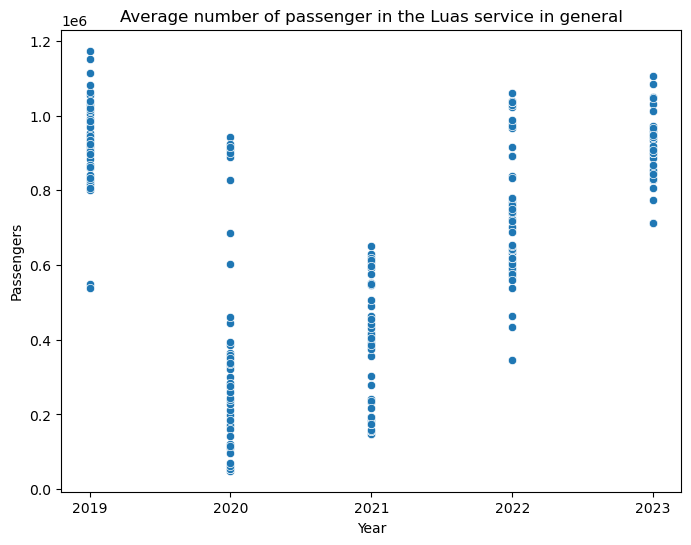

In [26]:
#Plotting the average passanger per year in all the tram lines
label_graph("Year", "Passengers","Average number of passenger in the Luas service in general", 8, 6)
sns.scatterplot(data = df_ireland1.loc[df_ireland1["Luas_line"] == "All Luas lines"], x = "Year", y = "Passengers");

In [131]:
import panel as pn
pn.extension()

year_select = pn.widgets.Select(name = "Year", options = ["2019", "2020", "2021", "2022", "2023"])
multi_select = pn.widgets.MultiSelect(name = 'MultiSelect',options = ["All lines", "Green line", "Red Line"])
idf = df_ireland1.interactive()

def update_dataframe(event):
    selected_year = year_select.value
    selected_lines = multi_select.value

    if "All lines" in selected_lines:
        selected_lines = df_ireland1['Luas_line'].unique()

    idf = idf[(idf["Year"] == selected_year) & (idf["Luas_line"].isin(selected_lines))]

idf.hvplot(kind = "line", x = "Week_Year", y = "Passengers", width = 900, rot = 90)
    




In [132]:
year_select = pn.widgets.Select(name = "Year", options = ["2019", "2020", "2021", "2022", "2023"])
idf = df_general.interactive()
idf = idf[(idf["Year"] == year_select)]

idf.head()
#label_graph("Year", "Passengers","Average number of passenger in the Luas service in general", 10, 6)
idf.hvplot(kind = "line", x = "Week_Year", y = "Passengers", width = 900, rot = 90)

In [123]:
explorer(df_expanded)

hvDataFrameExplorer(axes=Axes(explorer=..., height=None, legend='right', logx=False, logy=False, name='Axes74654', responsive=False, shared_axes=True, width=None, xlim=None, ylim=None), by=[], colormapping=Colormapping(clim=None, cmap='kbc_r', cnorm='linear', color=None, colorbar=None, explorer=..., name='Colormapping74714', rescale_discrete_levels=True, symmetric=False), groupby=[], kind='line', labels=Labels(clabel='', explorer=..., fontscale=1, name='Labels74761', rot=0, title='', xlabel='', ylabel=''), name='hvDataFrameExplorer74621', operations=Operations(aggregator=None, datashade=False, dynspread=False, explorer=..., name='Operations74805', rasterize=False, x_sampling=None, y_sampling=None), style=Style(alpha=1, explorer=..., name='Style74849'), x='index', y='Year', y_multi=[], z=None)

**Dataset other countries exploration**

In [ ]:
#Importing the datasets
df_eucountries = pd.read_csv("estat_rail_pa_total_en.csv")

In [ ]:
#Exploring dataset by dataset
df_eucountries.head()

In [ ]:
#Examining the dataset's shape
df_eucountries.shape

In [ ]:
#Dropping unnecessary columns
df_eucountries.drop(columns = ["LAST UPDATE","freq","OBS_FLAG"], axis = 1, inplace = True)
df_eucountries.head()

In [ ]:
#Examining the data types included in the dataset
df_eucountries.dtypes

In [ ]:
#Examining general statistics parameters of the dataset
df_eucountries.describe()

In [ ]:
#Having a look at the general information of the dataset
df_eucountries.info()

From the inspection above it has been identified missing values in the attribute "OBS_VALUE".

In [ ]:
#Confirming the presence or not of null values
print(f'Duplicated values on dataset:\n{df_eucountries.isna().sum()}\n')

#Confirming the presence or not of duplicated values
print(f'Duplicated values on dataset: {df_eucountries.duplicated().sum()}')

In [ ]:
#Identifying the missing values to make a decision of how to proceed with it
null_data = df_eucountries[df_eucountries.isnull().any(axis=1)]
null_data

The missing values does not corresponden to an specific country, it seems just have been issues in the recording of the data. This values will be deleted because they are going to affect in the visualization, tests and models.

In [ ]:
#Dropping the missing values
df_eucountries.dropna(inplace = True)
df_eucountries

In [ ]:
#Confirming the presence or not of null values
print(f'Duplicated values on dataset:\n{df_eucountries.isna().sum()}\n')

#Confirming the presence or not of duplicated values
print(f'Duplicated values on dataset: {df_eucountries.duplicated().sum()}')

In [ ]:
#Renaming columns for better understanding
df_eucountries.rename(columns = {"DATAFLOW": "Statistic_label","unit": "Unit", "geo": "Country_code", "TIME_PERIOD": "Year", "OBS_VALUE": "Passengers"}, inplace = True)
df_eucountries

In [ ]:
#Identifying unique values per attribute
dataframe_uniques(df_eucountries)

The data corresponding to "MIO_PKM" will not be used in this project and it will be drop in this case.
Regarding to the countries and years included in the dataset the corresponding data of interest will be selected from the complete dataset in order to use it on the corresponding comparisions that is aim as purpose of the project.

In [ ]:
#Importing codes the datasets
df_codes = pd.read_csv("country_codes.tsv",  sep='\t')
df_codes

In [ ]:
#Deleting attributes that will not be needed in the merge 
df_codes.drop(columns = ["Numeric"], axis = 1, inplace = True)
df_codes

In [ ]:
#Renaming columns for better understanding
df_codes.rename(columns = {"Alpha-2 code": "Country_code","Alpha-3 code": "Alpa_3code"}, inplace = True)

In [ ]:
df_eucountries_code = pd.merge(df_eucountries, df_codes, on = "Country_code")
df_eucountries_code

In [ ]:
#Reindexing the dataset for understanding purposes
df_eucountries_code = df_eucountries_code[["Statistic_label","Year","Country_code","Country","Alpa_3code","Unit","Passengers"]]
df_eucountries_code

In [ ]:
#Identifying unique values per attribute
dataframe_uniques(df_eucountries_code)

In [ ]:
#Selecting the years and countries of interest
df_eu = df_eucountries_code.loc[(df_eucountries_code["Year"] >= 2018) & (df_eucountries_code["Year"] < 2023) & (df_eucountries_code["Unit"] == "THS_PAS") & (df_eucountries_code["Country"].isin(["Spain","France","Italy","Germany","Denmark","Austria","Portugal","Finland"]))]
df_eu

In [ ]:
df_eu["Passengers"]  = df_eu["Passengers"].apply(lambda x : x*1000)
df_eu

In [ ]:
df_eu.shape

In [ ]:
mean_eu = np.mean(df_eu["Passengers"])
mean_eu

## Statistics

- Descriptive statistics and visualizations to summarise the datasets

**Descriptive statistics Ireland Dataset**

Shape of the data

In [ ]:
sns.histplot(df_general["Passengers"], kde=True);

- Modes 

In this case it is Non- Symmetric bi-modal distribution due to the presence of two modes (two values that occur more frequently than any other).
It in fact a Non - Symmetric left - skewed bi modal distribution.

In [ ]:
sns.kdeplot(df_general["Passengers"]);

- Skewness

In [ ]:
#Skewness of the data
s = df_general["Passengers"].skew()
print(f'Coefficient of skewness (S): {s}')

It is known that negative values of skewness refers to Left-Skewed (Negative). Even if the distribution shows a bimodal distribution it it is evident the same has a left-skewed behaviour.


- Kurtosis

In [ ]:
#Kurtosis of the data
k = df_general["Passengers"].kurtosis()
print(f'Kurtosis (K): {s}')

A negative kurtosis indicates a Platykurtic distribution it's shape is more flatter than normal and spread out, most of the values are in a range, leaving the tails with not so many records.

Measures of central tendency

In [ ]:
median = np.median(df_general["Passengers"])
print(f'Median: {median}')
mean = np.mean(df_general["Passengers"])
print(f'Mean: {mean}')
maximun = max(df_general["Passengers"])
print(f'Max Value: {maximun}')
minimun = min(df_general["Passengers"])
print(f'Min Value: {minimun}')
rangev = np.ptp(df_general["Passengers"])
print(f'Range: {rangev}')

In [ ]:
sns.histplot(df_general["Passengers"], kde=True);
plt.axvline(x = df_general["Passengers"].mean(),
            color='red');
plt.axvline(x = df_general["Passengers"].median(),
            color='yellow');

As seen in the grapgh above being the "red" line is the mean and the "yellow" the median. For the used dataset distribution it would be better to use the median due to the Left skewness of the data, being the median the value in between the mean and the left mode in this case.

Measures of variability

In [ ]:
sns.boxplot(data = df_general["Passengers"], orient = "h");

In [ ]:
df_general.describe()

In [ ]:
std = np.std(df_general["Passengers"], ddof =1)
print(f'Standard deviation: {std}')

In [ ]:
quantiles = np.quantile(df_general["Passengers"],[0,0.25,0.5,0.75,1])
print(f'Quantiles: {quantiles}')

In [ ]:
q1 = np.quantile(df_general["Passengers"],0.25)
print(f'Q1: {q1}')
q2 = np.quantile(df_general["Passengers"],0.5)
print(f'Q2: {q2}')
q3 = np.quantile(df_general["Passengers"],0.75)
print(f'Q3: {q3}')

from scipy.stats import iqr
iqr = iqr(df_general["Passengers"])
print(f'IQR: {iqr}')

In [ ]:
#Outliers
Outliers = df_general[((df_general["Passengers"]<(q1-1.5*iqr)) | (df_general["Passengers"]>(q3+1.5*iqr))) ]

In [ ]:
print(f'Outliers_shape:  {Outliers.shape}')
print(f'df_general: {df_general.shape}')

In [ ]:
outliers = (df_general[~((df_general["Passengers"]<(q1-(1.5*iqr))) | (df_general["Passengers"]>(q3+(1.5*iqr)))) ] )
outliers

Graphically representation of the dataset compared to a normal distribution

In [ ]:
sns.distplot(df_general["Passengers"], fit = norm);
# plt.axvline(x = df_general["Passengers"].median(),
#             color='yellow');

- Shapiro - Wilk test

Hypothesis

Ho (Accepted): The data are normally distributed (Po > 0.05)

Ha (Rejected): The data are not normally distributed 

In [ ]:
shapiro(df_general["Passengers"])

Based on the results it would have to be concluded, that being the pvalue obtained with the Shapiro Test 2.68 which it is greater than 0.05, the null hypothesis would have to be accepted. However, graphically it is evident the data is not normally distributed.

It is important to note that the Shapiro-Wilk test is a one-tailed test, meaning that it only detects deviations from normality in one tail of the distribution. Therefore, it is possible for a data set to be non-normal but not detected by the Shapiro-Wilk test. Therefore, other techniques would be used to test normality in this case.

- Q-Q plot

In [ ]:
qqplot(df_general["Passengers"],norm, fit = True, line = "45")
plt.show()

It can be seen the two modes representing in the qqplot. It also shows how the data does not follows a normal ditribution.

- Inferential statistics

**Sampling the data (Ireland dataset)**

In [ ]:
sample_size = 80
sample = df_general.sample(sample_size, random_state = 40)

sns.distplot(sample["Passengers"], fit = norm);

**Z-score test (Ireland dataset)**

Ho: The mean of the passangers is equal to 656782.31

Ha: The mean of the passangers i not equal to 656782.31

In [ ]:
import math

#Values 
n = sample_size
cl = 0.95
alpha = 0.05
x_bar = np.mean(sample["Passengers"])
x = df_general["Passengers"].mean()
square = math.sqrt(n)
std_p = np.std(df_general["Passengers"], ddof =1)
std_error  = std_p / square

cvalue_p = norm.ppf(1-(alpha/2))
print(f'cvalue_p = {cvalue_p}')
cvalue_n = norm.ppf((alpha/2))
print(f'cvalue_n = {cvalue_n}')
z = (x_bar-x)/std_error
print(f'Z_score: {z}')

Having a confidence interval of 95% it means our p values correspondes to 5% divided into the 2 tails. 
The critical value in the normal would be then the 1-0.025 = 0.975 which in the Z score table gives us a value of 1.96.

The Z score obtained is in between the value of the ranges of acceptability 
which leads of to fail to reject the null Hypothesis.

In [ ]:
if (z >= cvalue_p) & (z <= cvalue_n):
    print("Reject the null hypothesis")
else: 
    print("Fail to reject of the null hypothesis.")

In [ ]:
print(f'Population mean: {x}')
print(f'Sample mean: {x_bar}')

**Significance level - (Ireland dataset)**

P-value

In [ ]:
#With a Z score of 0.36 the P value would be 0.6406
p_value_test = norm.cdf(z)

print(f'P_value: {p_value_test}')
print(f'P_value <= alpha: {p_value_test<=alpha}')

# Interpret the results
alpha = 0.05
if p_value_test < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")


Fail to reject the null hypothesis due to the fact that the P value is greater than 0.05 which leads us to accept the null hypothesis

**Confidence interval (Ireland dataset)**

In [ ]:
x_bar = np.mean(sample["Passengers"])
cl = 0.95
z =1.96
std_sample = np.std(sample["Passengers"])
square = math.sqrt(n)

In [ ]:
margin_of_error = z*(std_sample/square)
print(f'Margin of error ME = {margin_of_error}')

In [ ]:
print(f'confidence_interval_lower = {x_bar - margin_of_error}')
print(f'confidence_interval_upper = {x_bar + margin_of_error}')

**One sample proportion test (Ireland dataset)**

In [ ]:
sample_size_prop = 80
sample_prop = df_expanded.sample(sample_size_prop, random_state = 40)

sns.distplot(sample_prop["Passengers"], fit = norm);

In [ ]:
# Example data
sample_success = sample_prop.loc[sample_prop["Luas_line"] == "Green line"]["Passengers"].count()  
population_proportion = 0.6
print(sample_size_prop, sample_success)
# Conduct one-sample proportion test
z_stat, p_value = proportions_ztest(sample_success, sample_size_prop, population_proportion)

# Display the results
print(f'Z-statistic: {z_stat}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The sample proportion is significantly different from the population proportion.")
else:
    print("Fail to reject the null hypothesis: The sample proportion is not significantly different from the population proportion.")

**Sampling the data (Eu dataset)**

In [ ]:
sample_size_eu = 20
sample_eu = df_eu.sample(sample_size_eu, random_state = 50)

sns.distplot(sample_eu["Passengers"], fit = norm);

**T-test (EU dataset)**

Ho: The mean of the passangers is equal to 660085225.0

Ha: The mean of the passangers is not equal to 660085225.0

In [ ]:
#Values 
n_eu = sample_size_eu
cl = 0.95
alpha = 0.05
x_bar_eu = np.mean(sample_eu["Passengers"])
x = df_eu["Passengers"].mean()
square_eu = math.sqrt(n_eu)
std_p_eu = np.std(df_eu["Passengers"], ddof =1)
std_error_eu  = std_p_eu / square_eu
df = n_eu-1

cvalue_p = t.ppf(1-(alpha/2),df)
print(f'cvalue_p = {cvalue_p}')
cvalue_n = t.ppf((alpha/2),df)
print(f'cvalue_n = {cvalue_n}')
t_value = (x_bar_eu-x)/std_error_eu
print(f't_value: {t_value}')

In [ ]:
if t_value < cvalue_n or t_value > cvalue_p:
    print("⚠️Reject the null hypothesis.")
else: 
    print("⚠️Fail to reject of the null hypothesis.")

**Significance level - (EU dataset)**

P-value

In [ ]:
#Calculating the p_value
p_value_test = 2*(1 - t.cdf(abs(t_value),df=df))

print(f'P_value: {p_value_test}')
print(f'P_value <= alpha: {p_value_test<=alpha}')

alpha = 0.05
if p_value_test < alpha:
    print("Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.")

**Confidence interval (EU dataset)**

In [ ]:
n_eu = sample_size_eu
cl = 0.95
square_eu = math.sqrt(n_eu)

t_critical = t.ppf((1+cl) / 2, df)

std_sample_eu = np.std(sample_eu["Passengers"], ddof =1)
std_error_sample  = std_sample_eu / square_eu

margin_of_error = t_critical * std_error_sample

lower_bound = x_bar_eu - margin_of_error
upper_bound = x_bar_eu + margin_of_error

print("Confidente Interval:", (lower_bound, upper_bound))

**#1 Independent two - tailed t - test (Ireland  and EU datasets)**

Ho: The mean of the passangers of Ireland dataset is equal to the mean of EU dataset

Ha: The mean of the passangers of Ireland dataset is not equal to the mean of EU dataset

In [ ]:
n = sample_size
n_eu = sample_size_eu
x_bar = np.mean(sample["Passengers"])
x_bar_eu = np.mean(sample_eu["Passengers"])
std_sample = np.std(sample["Passengers"])
std_sample_eu = np.std(sample_eu["Passengers"], ddof =1)
cl = 0.95
df = (n + n_eu)-2

cvalue_p = t.ppf(1 - alpha / 2 ,df)
print(f'cvalue_p = {cvalue_p}')
cvalue_n = t.ppf(alpha / 2 ,df)
print(f'cvalue_n = {cvalue_n}')
t_value = (x_bar - x_bar_eu) / (math.sqrt((std_sample**2 / n) + (std_sample_eu**2 / n_eu)))
print(f't_value: {t_value}')

In [ ]:
if t_value < cvalue_n or t_value > cvalue_p:
    print("⚠️Reject the null hypothesis.")
else: 
    print("⚠️Fail to reject of the null hypothesis.")

**Significance level - (Ireland and EU datasets)**

In [ ]:
#Calculating the p_value
p_value_test = 2*(1 - t.cdf(abs(t_value) ,df=df))

print(f'P_value: {p_value_test}')
print(f'P_value <= alpha: {p_value_test<=alpha}')

The null hypothesis is rejected due to the fact that the P value is not greater than the alpha.

**#2 Independent left - tailed t - test (Ireland  and EU datasets)**

Ho: The mean of the passangers of Ireland dataset is > = than the mean of EU dataset

Ha: The mean of the passangers of Ireland dataset < than the mean of EU dataset

In [ ]:
n = sample_size
n_eu = sample_size_eu
x_bar = np.mean(sample["Passengers"])
x_bar_eu = np.mean(sample_eu["Passengers"])
std_sample = np.std(sample["Passengers"])
std_sample_eu = np.std(sample_eu["Passengers"], ddof =1)
cl = 0.95
df = (n + n_eu)-2

cvalue_n = t.ppf(alpha ,df)
print(f'cvalue_n = {cvalue_n}')
t_value = (x_bar - x_bar_eu) / (math.sqrt((std_sample**2 / n) + (std_sample_eu**2 / n_eu)))
print(f't_value: {t_value}')

In [ ]:
if t_value < cvalue_n:
    print("⚠️Reject the null hypothesis.")
else: 
    print("⚠️Fail to reject of the null hypothesis.")

**Significance level - (Ireland and EU datasets)**

In [ ]:
#Calculating the p_value
p_value_test = t.cdf(t_value ,df=df)

print(f'P_value: {p_value_test}')
print(f'P_value <= alpha: {p_value_test<=alpha}')

In [ ]:
alpha = 0.05
if p_value_test < alpha:
    print("Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.")

**#3 One - Way ANOVA test (Ireland  and EU datasets)**

Ho: The mean of the passangers of Ireland dataset is equal to the mean of EU dataset

Ha: The mean of the passangers of Ireland dataset is not equal to the mean of EU dataset


In [ ]:
# Perform a one-way ANOVA
f_statistic, p_value = f_oneway(df_general["Passengers"], df_eu["Passengers"])

# Display the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Make a decision based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that at least one group mean is different.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence of a difference in group means.")

**#4 One - Way ANOVA test (Ireland  and Second EU datasets)**

Ho: The mean of the passangers of Ireland dataset is equal to the mean of second EU dataset

Ha: The mean of the passangers of Ireland dataset is not equal to the mean of second EU dataset

In [ ]:
#Selecting second EU dataset
df_eu2 = df_eucountries_code.loc[(df_eucountries_code["Year"] >= 2018) & (df_eucountries_code["Year"] < 2023) & (df_eucountries_code["Unit"] == "THS_PAS") & (df_eucountries_code["Country"].isin(["Estonia","Croatia","Turkey","Bulgaria"]))]
df_eu2

In [ ]:
# Perform a one-way ANOVA
f_statistic, p_value = f_oneway(df_general["Passengers"], df_eu2["Passengers"])

# Display the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Make a decision based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that at least one group mean is different.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence of a difference in group means.")

**#5 Independent right - tailed t - test (Ireland  and second EU datasets)**

Ho: The mean of the passangers of Ireland dataset is <= than the mean of EU dataset

Ha: The mean of the passangers of Ireland dataset > than the mean of EU dataset

In [ ]:
n = sample_size
n_eu2 = len(df_eu2["Passengers"])
x_bar = np.mean(sample["Passengers"])
x_bar_eu2 = np.mean(df_eu2["Passengers"])
std_sample = np.std(sample["Passengers"])
std_sample_eu2 = np.std(df_eu2["Passengers"], ddof =1)
cl = 0.95
df = (n + n_eu2)-2

cvalue_p = t.ppf(1-alpha ,df)
print(f'cvalue_p = {cvalue_p}')
t_value = (x_bar - x_bar_eu2) / (math.sqrt((std_sample**2 / n) + (std_sample_eu2**2 / n_eu2)))
print(f't_value: {t_value}')

In [ ]:
if t_value > cvalue_p:
    print("⚠️Reject the null hypothesis.")
else: 
    print("⚠️Fail to reject of the null hypothesis.")

In [ ]:
#Calculating the p_value
p_value_test = t.cdf(1-t_value ,df=df)

print(f'P_value: {p_value_test}')
print(f'P_value <= alpha: {p_value_test<=alpha}')

alpha = 0.05
if p_value_test < alpha:
    print("Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.")

# Machine Learning

In [ ]:
results = []

def save_results(model,train_score,test_score):
    results.append([model,train_score,test_score])
    
def show_results():
    x = PrettyTable()
    x.field_names = ["Model", "Train Score", "Test Scores"]
    for result in results:
         x.add_row([result[0],"{:.2f}".format(result[1]),"{:.2f}".format(result[2])])    
    print(x)

**Preprocessing the data before building the models**

In [ ]:
df_general

In [ ]:
df_general["Week"] = df_general["Week_Year"].apply(lambda x: x.split(" ")[1])
df_general["date"] =  pd.to_datetime(df_general['Year'].astype(str) + df_general['Week'].astype(str) + '0', format='%G%V%w')
df_general["month"] = df_general["date"].apply(lambda x: x.month ) 
df_ml = df_general.groupby(["Year","month"]).agg({"Passengers": "sum"}).reset_index()
condition = df_general["Year"] > str("2019")
df_ml = df_general[condition]
df_ml["Year"] = df_ml["Year"].astype("int64")
df_ml["Week"] = df_ml["Week"].astype("int64")
df_ml.info()

**Linear Regression**

In [ ]:
#Splitting the data
X = df_ml[["Year","month"]]
y = df_ml["Passengers"]

# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)
predicted_passengers = my_lm.predict(X)

#Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Storing the results
save_results("Linear regression model",train_r2,test_r2)

#Plot result
label_graph("Year", "Passengers", "Linear Regression Model",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predicted_passengers, data = df_ml, color='red', label='Linear Regression Line')

# Show the plot
plt.show()

# Display the score values
print("Training set R^2 score: {:.2f}".format(my_lm.score(X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(my_lm.score(X_test, y_test)))

**Lagged Linear Regression**

In [ ]:
df_ml_lagged = df_ml.copy()
#Adding lagged variable
df_ml_lagged["passenger_l1"] = df_ml_lagged["Passengers"].shift(1)
df_ml_lagged["passenger_l2"] = df_ml_lagged["Passengers"].shift(2)
df_ml_lagged["passenger_l3"] = df_ml_lagged["Passengers"].shift(3)
df_ml_lagged["passenger_l4"] = df_ml_lagged["Passengers"].shift(4)
df_ml_lagged["passenger_l5"] = df_ml_lagged["Passengers"].shift(5)

# Display the first 10 records
df_ml_lagged.head(10)

In [ ]:
# Drop Null values from the dataframe
df_ml_lagged = df_ml_lagged.dropna()

# Display the first 10 records
df_ml_lagged.head(10)

In [ ]:
#Fitting the full Linear Regression model

#Create X and y objects
X = df_ml_lagged[["Year","month","passenger_l1", "passenger_l2", "passenger_l3", "passenger_l4", "passenger_l5"]]
y = df_ml_lagged["Passengers"]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

#Fit the model
ml_lml = LinearRegression()
ml_lml.fit(X_train, y_train)

#Calculate the train Forecasting
train_fcst = ml_lml.predict(X_train)
test_fcst = ml_lml.predict(X_test)
predicted_passengers = ml_lml.predict(X)

#Calculate teh r2 score for train and test
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Storing the results
save_results("Lagged Linear regression",train_r2,test_r2)

#Plot result
label_graph("Year", "Passengers", "Lagged Linear Regression Model",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml_lagged , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predicted_passengers, data = df_ml_lagged, color='red', label='Lagged Linear Regression Model Line')

# Show the plot
plt.show()

# Display the score values
print("Training set R^2 score: {:.2f}".format(ml_lml.score(X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(ml_lml.score(X_test, y_test)))

**Polynomial Regression**

In [ ]:
# Create X and y objects
X = df_ml[["Year","month"]]
y = df_ml["Passengers"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

poly = PolynomialFeatures(degree = 2)
poly
poly_features = poly.fit_transform(X)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)
poly_model = LinearRegression()
poly_model.fit(poly_features, y)  

train_fcst = poly_model.predict(poly_X_train)
test_fcst = poly_model.predict(poly_X_test)

train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

# Storing the results
save_results("Polinomial regression model",train_r2,test_r2)

predict_passengers = poly_model.predict(poly_features)

#Plot result
label_graph("Year", "Passengers", "Polynomial Regression Model",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predict_passengers, data = df_ml, color='red', label='Polynomial Regression Line')

# Show the plot
plt.show()

# Display the score values
print("Training set R^2 score: {:.2f}".format(poly_model.score(poly_X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(poly_model.score(poly_X_test, y_test)))

**Polynomial Regression - GridSearchCV**

In [ ]:
#Create X and y objects
X = df_ml[["Year","month"]]
y = df_ml["Passengers"]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

#Tune Hyperparameters
poly_reg = make_pipeline(PolynomialFeatures(), LinearRegression())
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
param_grid = {'polynomialfeatures__degree': np.arange(2, 10)}
grid_search = GridSearchCV(poly_reg, param_grid, scoring = 'r2', cv = folds, verbose = 1, n_jobs = -1)
grid_search.fit(X_train, y_train)

#Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best Hyperparameter Values:", best_params)

#Get the best model
best_model = grid_search.best_estimator_

#Predictions and R^2 scores
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

#Storing the results
save_results("Polynomial Regression Model - GridsearchCV",train_r2,test_r2)

# Plot the results
poly_X = best_model.named_steps['polynomialfeatures'].transform(X)
predict_passengers = best_model.predict(X)

#Plot result
label_graph("Year", "Passengers", "Polynomial Regression Model - GridsearchCV",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predict_passengers, data = df_ml, color='red', label='Polynomial Regression Model Line - GridsearchCV')

# Show the plot
plt.show()

# Display the score values
print("Training set R^2 score: {:.2f}".format(best_model.score(X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(best_model.score(X_test, y_test)))
print(f'Best Hyperparameters: {grid_search.best_params_}')
print("Cross - Validation best score: {:.2f}".format(grid_search.best_score_))

**Ridge model**

In [ ]:
from sklearn.linear_model import Ridge

#Splitting the data
X = df_ml[["Year","month"]]
y = df_ml["Passengers"]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

#Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

#Calculate the train Forecasting
train_fcst = ridge.predict(X_train)
test_fcst = ridge.predict(X_test)
predicted_passengers = ridge.predict(X)

#Calculate teh r2 score for train and test
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Storing the results
save_results("Ridge regression model",train_r2,test_r2)

#Plot result
label_graph("Year", "Passengers", "Ridge Regression Model",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Population')
sns.lineplot(x = "date", y = predicted_passengers, data = df_ml, color='red', label='Ridge regression model Line')

#Show the plot
plt.show()

#Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

**Ridge model - GridsearchCV**

In [ ]:
#Create X and y objects
X = df_ml[["Year","month"]]
y = df_ml["Passengers"]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

#Tune Hyperparameters
poly_reg = make_pipeline(PolynomialFeatures(), Ridge())
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
param_grid = {'polynomialfeatures__degree': np.arange(2, 10),"ridge__alpha": [0.1,1,100,1000]}
grid_search = GridSearchCV(poly_reg, param_grid, scoring = 'r2', cv = folds, verbose = 1, n_jobs = -1)
grid_search.fit(X_train, y_train)

#Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best Hyperparameter Values:", best_params)

#Get the best model
best_model = grid_search.best_estimator_

#Predictions and R^2 scores
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

#Storing the results
save_results("Ridge Regression Model - GridsearchCV",train_r2,test_r2)

#Plot the results
poly_X = best_model.named_steps['polynomialfeatures'].transform(X)
predict_passengers = best_model.predict(X)

#Plot result
label_graph("Year", "Passengers", "Ridge Regression Model - GridsearchCV",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predict_passengers, data = df_ml, color='red', label='Ridge Regression Model Line - GridsearchCV')

# Show the plot
plt.show()

# Display the score values
print("Training set R^2 score: {:.2f}".format(best_model.score(X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(best_model.score(X_test, y_test)))
print(f'Best Hyperparameters: {grid_search.best_params_}')
print("Cross - Validation best score: {:.2f}".format(grid_search.best_score_))

**Decision Tree Regression**

In [ ]:
#Store the feature or attribute values in X and y
X = df_ml[["Year","month"]].values
y = df_ml["Passengers"].values

#Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

#Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Initialise an object by calling a method DecisionTreeRegressor()
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X, y)

train_fcst = tree.predict(X_train)
test_fcst = tree.predict(X_test)
predicted_passengers = tree.predict(X)

#Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Storing the results
save_results("Decision Tree regression model",train_r2,test_r2)

#Plot result
label_graph("Year", "Passengers", "Decision Tree Regression Model",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predicted_passengers, data = df_ml, color='red', label='Decision tree Regression Line')

# Show the plot
plt.show()

# Display the score values for Decision Tree function
print("Training set score: {:.2f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree.score(X_test, y_test)))

**Decision Tree Regression - GridSearchCV**

In [ ]:
#Store the feature or attribute values in X and y
X = df_ml[["Year","month"]].values
y = df_ml["Passengers"].values

#Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

#Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Tune Hyperparameters
tree = DecisionTreeRegressor()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
tree_params = [{'max_depth': list(range(4, 20))}]
clf = GridSearchCV(tree, tree_params, cv = folds, scoring='r2', n_jobs = -1)
clf.fit(X_train, y_train)

#Predictions
train_fcst = clf.predict(X_train)
test_fcst = clf.predict(X_test)
predicted_passengers = clf.predict(X)

#Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Storing the results
save_results("Decision Tree Regression Model - GridsearchCV",train_r2,test_r2)

#Plot result
label_graph("Year", "Passengers", "Decision Tree Regression Model - GridsearchCV",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predicted_passengers, data = df_ml, color='red', label='Decision Tree Regression Line - GridsearchCV')

# Show the plot
plt.show()

# Display the score values for Decision Tree function
print("Training set score: {:.2f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(clf.score(X_test, y_test)))
print(f'Best Hyperparameters: {clf.best_params_}')
print("Cross - Validation best score: {:.2f}".format(clf.best_score_))

**Random forest regression**

In [ ]:
#Store the feature or attribute values in X and y
X = df_ml[["Year","month"]].values
y = df_ml["Passengers"].values

#Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

#Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Initialise an object by calling a method DecisionTreeRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion='squared_error',
                               max_depth  = None,
                               min_samples_split = 2, 
                               min_samples_leaf = 1)
forest.fit(X, y)

train_fcst = forest.predict(X_train)
test_fcst = forest.predict(X_test)
predicted_passengers = forest.predict(X)


#Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Store the results
print(train_r2, test_r2)
save_results("Random forest Regression model",train_r2,test_r2)

#Plot result
label_graph("Year", "Passengers", "Random forest Regression Model",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predicted_passengers, data = df_ml, color='red', label='Random forest Regression Line')

#Show the plot
plt.show()

#Display the score values for Fores function
print("Training set score: {:.2f}".format(forest.score(X_train, y_train)))
print("Test set score: {:.2f}".format(forest.score(X_test, y_test)))

**Random forest regression - GridsearchCV**

In [ ]:
#Store the feature or attribute values in X and y
X = df_ml[["Year","month"]].values
y = df_ml["Passengers"].values

#Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

#Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Tune Hyperparameters
forest = RandomForestRegressor()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
param_grid = {
    'n_estimators': [50, 100, 150,1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion':['squared_error']
}

grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, scoring = 'r2', cv = folds)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

train_fcst = grid_search.predict(X_train)
test_fcst = grid_search.predict(X_test)
predicted_passengers = grid_search.predict(X)

#Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Store the results
save_results("Random forest regression - GridsearchCV",train_r2,test_r2)

#Plot result
label_graph("Year", "Passengers", "Random forest regression - GridsearchCV",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predicted_passengers, data = df_ml, color='red', label='Random forest regression Line - GridsearchCV')

#Show the plot
plt.show()

#Display the score values for Forest function
print("Training set score: {:.2f}".format(grid_search.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print(f'Best Hyperparameters: {grid_search.best_params_}')
print("Cross - Validation best score: {:.2f}".format(grid_search.best_score_))

**Random forest regression - GridsearchCV**

In [ ]:
#Store the feature or attribute values in X and y
X = df_ml[["Year","month"]].values
y = df_ml["Passengers"].values

#Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

#Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Tune Hyperparameters
forest = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 150,1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion':['squared_error']
}

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(grid_search.best_params_)
print(grid_search.best_score_)

train_fcst = grid_search.predict(X_train)
test_fcst = grid_search.predict(X_test)
predicted_passengers = grid_search.predict(X)

#Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Store the results
save_results("Random forest regression - GridsearchCV",train_r2,test_r2)

#Plot result
label_graph("Year", "Passengers", "Random forest regression - GridsearchCV",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predicted_passengers, data = df_ml, color='red', label='Random forest regression Line - GridsearchCV')

# Show the plot
plt.show()

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(grid_search.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print(f'Best Hyperparameters: {grid_search.best_params_}')
print("Cross - Validation best score: {:.2f}".format(grid_search.best_score_))

In [ ]:
# Store the feature or attribute values in X and y
X = df_ml[["Year","month"]].values
y = df_ml["Passengers"].values

# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Tune Hyperparameters
forest = RandomForestRegressor()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
param_grid = {
    'n_estimators': [50, 100, 150,1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion':['squared_error']
}

grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, scoring = 'r2', cv = folds, verbose = 1, return_train_score = True)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


train_fcst = grid_search.predict(X_train)
test_fcst = grid_search.predict(X_test)
predicted_passengers = grid_search.predict(X)


#Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Display the training and test score
print(train_r2, test_r2)
#save_results("Random forest regression - (GridsearchCV)",train_r2,test_r2)

#Plot result
label_graph("Year", "Passengers", "Random forest regression - (GridsearchCV)",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predicted_passengers, data = df_ml, color='red', label='Random forest regression Line - (GridsearchCV)')

# Show the plot
plt.show()

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(grid_search.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print(f'Best Hyperparameters: {grid_search.best_params_}')
print("Cross - Validation best score: {:.2f}".format(grid_search.best_score_))

**Tabulating results**

In [ ]:
show_results()

- Sentimental analysis

**Sentimental analysis on Ireland Dataset**

In [ ]:
!pip install praw

In [ ]:
!pip install python-dotenv

In [ ]:
import praw
from datetime import datetime as dt
from dotenv import load_dotenv
from os import getenv

In [ ]:
load_dotenv()

In [ ]:
# Get the environmental variables
APP_NAME = getenv('APP_NAME')
APP_ID = getenv("APP_ID")
APP_SECRET = getenv("APP_SECRET")
USERNAME = getenv('REDDIT_USERNAME')
#PASSWORD = getenv('PASSWORD')


In [ ]:
#Testing
# Check that the variables all loaded
if APP_NAME and APP_ID and APP_SECRET and USERNAME:
    print("Credentials loaded")
else:
    print("ERROR: Credentials not loaded!!")


In [ ]:
#Connecting to Reddit
reddit = praw.Reddit(
    client_id = getenv("APP_ID"),
    client_secret = getenv("APP_SECRET"),
    user_agent = f'CA_02 u/ {getenv("REDDIT_USERNAME")}',
)
    

In [ ]:
print(reddit.read_only)

In [ ]:
subreddit = reddit.subreddit("Ireland")

In [ ]:
#Extracting the comments and relevant information
for post in subreddit.search("luas"):
    print("******")
    print("Text =", post.selftext)
    
    for comment in list(post.comments):
        print("Title =", post.title)
        print("Coment =", comment.body)
        print("Score =", comment.score)
        print("Comment count =", post.num_comments)
        print(dt.fromtimestamp(comment.created_utc))
        print("\n")
        print("------------------------------------------")
        
#print(subreddit.display_name)
#print(subreddit.title)
#print(subreddit.description)

In [ ]:
#Creating dataframe with the information extracted
postTitles = []
postComments = []

for post in subreddit.search("luas"):
    postTitles.append(post.title)
    
    if post.selftext != "":
          postTitles.append(post.selftext)
            
    for comment in list(post.comments):
        postComments.append(comment.body)
        
        if comment.body != "" and comment.body != "[deleted]":
             postComments.append(post.selftext)
    

In [ ]:
df_sent_titles = pd.DataFrame({
    "Post_title": postTitles,
})

In [ ]:
df_sent_comments = pd.DataFrame({
    "Comments": postComments,
})

In [ ]:
df_sent_titles

In [ ]:
df_sent_comments

**- Sentiment Analysis Post Titles**
 - Text processing

In [ ]:
#Converting all text into lower case
df_sent_titles["Post_title"]  = df_sent_titles["Post_title"].apply(lambda x : " ".join(x.lower() for x in x.split()))

#Taking away any character present
df_sent_titles["Post_title"]  = df_sent_titles["Post_title"].str.replace("[^\w\s]", "")

#Taking away stopwords
from nltk.corpus import stopwords
stop = stopwords.words("english")
df_sent_titles["Post_title"]  = df_sent_titles["Post_title"].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

#Tokenizing words
#df_sent["clean_comment"]  = df_sent["Post_title"].apply(lambda x : " ".join(nltk.word_tokenize(x).split()))

df_sent_titles.head()

In [ ]:
#Using textblox
!pip install textblob

In [ ]:
#Textblob
from textblob import TextBlob
df_sent_titles["Post_title"].apply(lambda x: str(TextBlob(x).correct()))

#Stemmer
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_sent_titles["st"] = df_sent_titles["Post_title"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#Lemmatize
nltk.download("wordnet")
from textblob import Word
df_sent_titles["ltz"] = df_sent_titles["Post_title"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df_sent_titles.head()

- Feauture extraction

In [ ]:
freq = pd.Series(' '.join(df_sent_titles["Post_title"]).split()).value_counts()[:15]
freq

In [ ]:
TextBlob(df_sent_titles["Post_title"][0]).ngrams(2)

- Model Sentiment Analysis

In [ ]:
def sentiment_analysis(dataset,feauture,new_feature,score):
    
    def getPolarity(text):
        return TextBlob(text).sentiment.polarity
    
    def Result_analysis(score):
        if score < 0:
            return "Negative"
        elif score == 0:
             return "Neutral"
        else:
            return "Positive"
    
    dataset[new_feature] = dataset[feauture].apply(getPolarity)
    dataset[score] = dataset[new_feature].apply(Result_analysis)


In [ ]:
sentiment_analysis(df_sent_titles,"st","st_sentiment","st_score")
sentiment_analysis(df_sent_titles,"ltz","ltz_sentiment","ltz_score")
df_sent_titles

### Sentiment Analysis Comments
 - Text processing

In [ ]:
#Converting all text into lower case
df_sent_comments["Comments"]  = df_sent_comments["Comments"].apply(lambda x : " ".join(x.lower() for x in x.split()))

#Taking away any character present
df_sent_comments["Comments"]  = df_sent_comments["Comments"].str.replace("[^\w\s]", "")

#Taking away stopwords
from nltk.corpus import stopwords
stop = stopwords.words("english")
df_sent_comments["Comments"]  = df_sent_comments["Comments"].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

df_sent_comments.head()

In [ ]:
#Textblob
# from textblob import TextBlob
# df_sent_comments["Comments"].apply(lambda x: str(TextBlob(x).correct()))

In [ ]:
#Stemmer
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_sent_comments["st"] = df_sent_comments["Comments"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#Lemmatize
nltk.download("wordnet")
from textblob import Word
df_sent_comments["ltz"] = df_sent_comments["Comments"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df_sent_comments.head()

In [ ]:
freq = pd.Series(' '.join(df_sent_comments["Comments"]).split()).value_counts()[:15]
freq

In [ ]:
TextBlob(df_sent_comments["Comments"][0]).ngrams(2)

In [ ]:
sentiment_analysis(df_sent_comments,"st","st_sentiment","st_score")
sentiment_analysis(df_sent_comments,"ltz","ltz_sentiment","ltz_score")
df_sent_comments

In [ ]:
sns.histplot(data = df_sent_comments["st_score"])

In [ ]:
# Create a subplot for each year
fig, axes = plt.subplots(ncols = 2, figsize = (20, 8), sharey = True)


hist_st = sns.histplot(data = df_sent_comments["st_score"].sort_values(), ax = axes[0])

score_group = df_sent_comments.groupby("st_score")["Comments"].count()

for score in range(len(score_group)):
     hist_st.text(score, score_group[score]/2, str(score_group[score]),
     fontdict = dict(color = "white", fontsize = 15),
     horizontalalignment = "center")
         
hist_ltz = sns.histplot(data = df_sent_comments["ltz_score"].sort_values(), ax = axes[1])

score_groupltz = df_sent_comments.groupby("ltz_score")["Comments"].count()

for score in range(len(score_groupltz)):
     hist_ltz.text(score, score_groupltz[score]/2, str(score_groupltz[score]),
     fontdict = dict(color = "white", fontsize = 15),
     horizontalalignment = "center")


plt.show()

In [ ]:
df_sent_comments

In [ ]:
df_sent_comments.groupby("st_score")["st_sentiment"].count()

**Sentimental analysis for EU Dataset**

In [ ]:
subreddit = reddit.subreddit("germany")

In [ ]:
#Extracting the comments and relevant information
for post in subreddit.search("tram"):
    print("******")
    print("Text =", post.selftext)
    
    for comment in list(post.comments):
        
        print("Title =", post.title)
        print("Coment =", comment.body)
        print("Score =", comment.score)
        print("Comment count =", post.num_comments)
        print(dt.fromtimestamp(comment.created_utc))
        print("\n")
        print("------------------------------------------")

In [ ]:
# Install the langid library
!pip install langid

In [ ]:
import langid

def is_english(text):
    lang, _ = langid.classify(text)
    return lang == 'en'

In [ ]:
english_comments = [comment for comment in all_comments if is_english(comment['body'])]

In [ ]:
# Extracting comments and relevant information
for post in subreddit.search("tram"):
    print("******")
    print("Title =", post.title)
    print("Text =", post.selftext)

    for comment in list(post.comments):
        if is_english(comment.body):
            print("Comment =", comment.body)
            print("Score =", comment.score)
            print("Comment count =", post.num_comments)
            print("Creation time =", dt.fromtimestamp(comment.created_utc))
            print("\n")
            print("------------------------------------------")


In [ ]:
#Creating dataframe with the information extracted
postTitles = []
postComments = []

for post in subreddit.search("tram"):
    postTitles.append(post.title)
    
    if post.selftext != "":
          postTitles.append(post.selftext)
            
    for comment in list(post.comments):
        postComments.append(comment.body)
        
        if comment.body != "" and comment.body != "[deleted]":
             postComments.append(post.selftext)
    

In [ ]:
df_sent_titles_eu = pd.DataFrame({
    "Post_title": postTitles,
})

In [ ]:
df_sent_comments_eu = pd.DataFrame({
    "Comments": postComments,
})

**Sentimental analysis titles - EU**

In [ ]:
#Converting all text into lower case
df_sent_titles_eu["Post_title"]  = df_sent_titles_eu["Post_title"].apply(lambda x : " ".join(x.lower() for x in x.split()))

#Taking away any character present
df_sent_titles_eu["Post_title"]  = df_sent_titles_eu["Post_title"].str.replace("[^\w\s]", "")

#Taking away stopwords
from nltk.corpus import stopwords
stop = stopwords.words("english")
df_sent_titles_eu["Post_title"]  = df_sent_titles_eu["Post_title"].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

#Tokenizing words
#df_sent["clean_comment"]  = df_sent["Post_title"].apply(lambda x : " ".join(nltk.word_tokenize(x).split()))

df_sent_titles_eu.head()

In [ ]:
#Textblob
from textblob import TextBlob
df_sent_titles_eu["Post_title"].apply(lambda x: str(TextBlob(x).correct()))

#Stemmer
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_sent_titles_eu["st"] = df_sent_titles_eu["Post_title"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#Lemmatize
nltk.download("wordnet")
from textblob import Word
df_sent_titles_eu["ltz"] = df_sent_titles_eu["Post_title"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df_sent_titles_eu.head()

In [ ]:
freq = pd.Series(' '.join(df_sent_titles_eu["Post_title"]).split()).value_counts()[:15]
freq

In [ ]:
TextBlob(df_sent_titles_eu["Post_title"][0]).ngrams(2)

In [ ]:
sentiment_analysis(df_sent_titles_eu,"st","st_sentiment","st_score")
sentiment_analysis(df_sent_titles_eu,"ltz","ltz_sentiment","ltz_score")
df_sent_titles_eu

**Sentimental analysis Comments - EU**

In [ ]:
#Converting all text into lower case
df_sent_comments_eu["Comments"]  = df_sent_comments_eu["Comments"].apply(lambda x : " ".join(x.lower() for x in x.split()))

#Taking away any character present
df_sent_comments_eu["Comments"]  = df_sent_comments_eu["Comments"].str.replace("[^\w\s]", "")

#Taking away stopwords
from nltk.corpus import stopwords
stop = stopwords.words("english")
df_sent_comments_eu["Comments"]  = df_sent_comments_eu["Comments"].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

df_sent_comments_eu.head()

In [ ]:
#Stemmer
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_sent_comments_eu["st"] = df_sent_comments_eu["Comments"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#Lemmatize
nltk.download("wordnet")
from textblob import Word
df_sent_comments_eu["ltz"] = df_sent_comments_eu["Comments"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df_sent_comments_eu.head()

In [ ]:
freq = pd.Series(' '.join(df_sent_comments_eu["Comments"]).split()).value_counts()[:15]
freq

In [ ]:
TextBlob(df_sent_comments_eu["Comments"][0]).ngrams(2)

In [ ]:
sentiment_analysis(df_sent_comments_eu,"st","st_sentiment","st_score")
sentiment_analysis(df_sent_comments_eu,"ltz","ltz_sentiment","ltz_score")
df_sent_comments_eu

In [ ]:
sns.histplot(data = df_sent_comments_eu["st_score"])

In [ ]:
# Create a subplot for each year
fig, axes = plt.subplots(ncols = 2, figsize = (20, 8), sharey = True)


hist_st = sns.histplot(data = df_sent_comments_eu["st_score"].sort_values(), ax = axes[0])

score_group = df_sent_comments_eu.groupby("st_score")["Comments"].count()

for score in range(len(score_group)):
     hist_st.text(score, score_group[score]/2, str(score_group[score]),
     fontdict = dict(color = "white", fontsize = 15),
     horizontalalignment = "center")
         
hist_ltz = sns.histplot(data = df_sent_comments_eu["ltz_score"].sort_values(), ax = axes[1])

score_groupltz = df_sent_comments_eu.groupby("ltz_score")["Comments"].count()

for score in range(len(score_groupltz)):
     hist_ltz.text(score, score_groupltz[score]/2, str(score_groupltz[score]),
     fontdict = dict(color = "white", fontsize = 15),
     horizontalalignment = "center")


plt.show()

**Dashboard**

In [ ]:
bar_ex = px.bar(
    data_frame = df_sent_comments_eu,
    x = "st_score")

In [ ]:
app = dash.Dash()

app.layout = html.Div(
    children = [
    html.H1("MSC_DA_CA - Dashboard"),
    html.Span(
    children = [
    f'Prepared: {datetime.now().date()}', 
    html.Br(),
    ' by ',
    html.B("Leda Gale (2023205), "),
    html.Br(),   
    html.I("MSc in Data Analytics (CCT College Dublin)")
    ]),
    dcc.Graph(id = " ", figure = bar_ex),
    dcc.DatePickerRange(
    initial_visible_month = datetime.now(),
    start_date = date(2019,1,1),
    end_date = date(2023,7,10),
)
])


if __name__ == "__main__":
    app.run_server(debug = True, port="8053")
    
    


In [ ]:
@app.callback(
    Output(component_id = "my_plot",
        component_property = "figure"),
    Input(component_id = "my_input",
        component_property = "value" )
)

def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )



In [ ]:
dcc.DatePickerSingle(
    initial_visible_month = datetime.now(),
    min_date_allowed = date(2019,1,1),
    max_date_allowed = date(2023,7,10),
)